# Principal Component Analysis
## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [3]:
df = pd.read_csv("data/wine.data")

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Implementation
#### Manual and Step-by-step
First we are going to load, split and standardize an example dataset to perform the PCA on. 

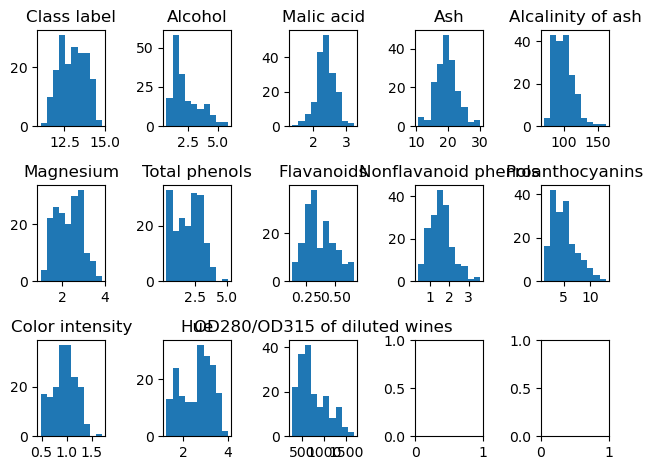

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=5) 
for i, col in enumerate(df.columns[1:]):
    axes[int(i/5)][int(i % 5)].hist(df[col])
    axes[int(i/5)][int(i % 5)].set_title(f"{df.columns[i]}")

plt.tight_layout()
plt.show()

Now we use sklearn train_test_split() to split our dataset into training and test data (80/20).

In [4]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,1:].values, df.iloc[:,0].values
# X, y = df.iloc[:,[1,3]].values, df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

Standardize data with sklearn:

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

pd.DataFrame(X_train_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.686632,-0.254824,0.283799,0.576105,-1.105684,-0.556920,-0.333052,0.944840,-0.426581,-0.960559,0.243415,0.198746,-0.213948
1,0.915743,-0.543667,0.102569,-1.054335,-0.735899,0.480514,0.724792,-0.600475,0.370999,0.234088,0.936872,0.414308,1.751107
2,0.706073,0.200321,1.117460,1.420441,0.447414,-1.195341,-1.173396,0.212849,-0.097146,1.539666,-0.958577,-1.166483,0.000980
3,0.595071,1.084353,-0.694845,-0.035310,-0.809856,-1.083617,-1.529306,1.758164,-1.241501,0.276754,-0.634964,-1.137742,-0.520988
4,-1.439962,0.471658,-0.549861,-0.472035,0.965113,-0.924012,-0.698849,0.538178,-1.120130,-1.024558,0.058493,-0.131784,-0.766620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.077063,-0.744981,-1.021060,-1.199910,-0.070285,0.161303,0.606155,-0.681808,-0.391904,-0.576565,1.075563,0.112521,0.829988
137,-1.661965,-0.412375,-1.673490,-1.054335,-0.144242,-1.099578,-0.451689,-0.193813,-0.773356,-0.533899,1.306716,-0.677875,-0.987689
138,0.323733,1.688296,-0.441123,0.110265,1.556769,-1.131499,-1.321692,0.538178,-0.426581,2.196722,-1.652034,-1.511383,0.261964
139,0.484069,1.364443,0.356291,0.983716,0.225543,-0.796328,-1.262374,0.538178,-0.322549,0.959409,-1.143499,-1.511383,0.000980


<AxesSubplot:>

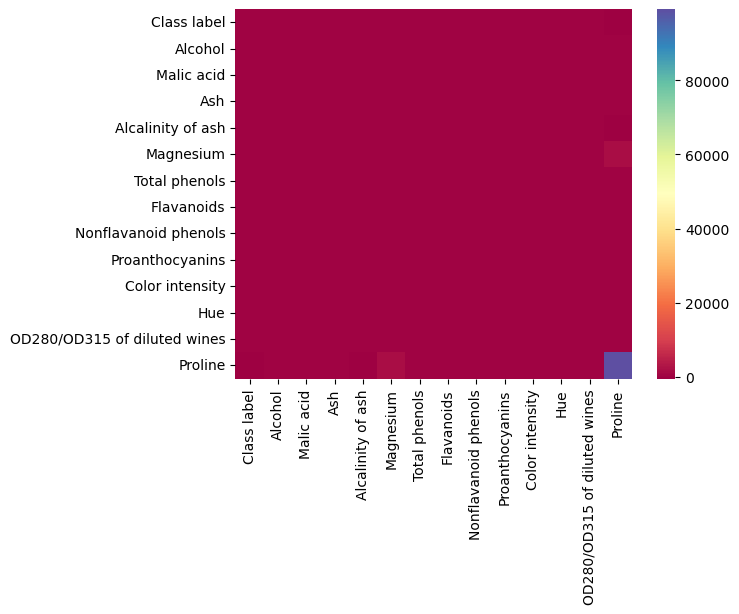

In [6]:
sns.heatmap(df.cov(),cmap=sns.color_palette("Spectral", as_cmap=True))

<AxesSubplot:>

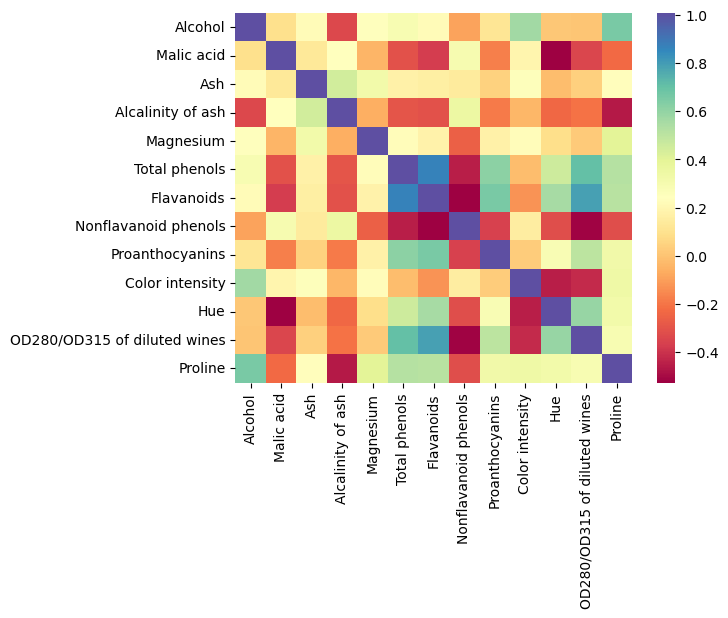

In [27]:
df2 = pd.DataFrame(X_train_std, columns=df.columns[1:])
sns.heatmap(df2.cov(),cmap=sns.color_palette("Spectral", as_cmap=True))

### Standardized feature distribution

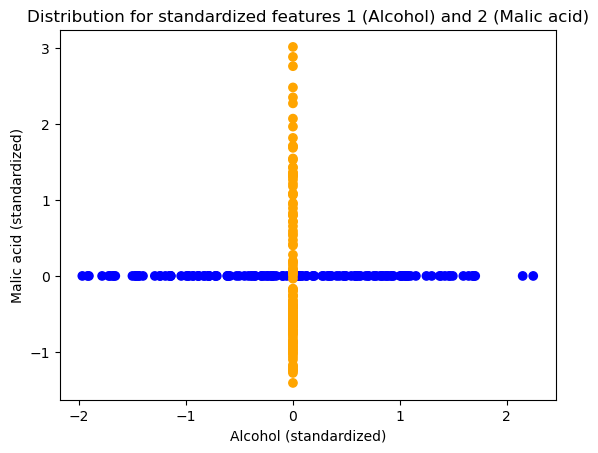

In [8]:
[0]*len(X_train_std) + [1]*len(X_train_std)
plt.scatter(X_train_std[:,0], [0]*len(X_train_std), c=["b"]*len(X_train_std))#, X_train_std[:,1])
plt.scatter([0]*len(X_train_std), X_train_std[:,1], c=["orange"]*len(X_train_std))
plt.title("Distribution for standardized features 1 (Alcohol) and 2 (Malic acid)")
plt.xlabel("Alcohol (standardized)")
plt.ylabel("Malic acid (standardized)")
plt.show()

We can extract the principal components by performing an eigendecomposition on the covariance matrix of our training data.

In [24]:
df.columns

Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [30]:
cov_mat = np.cov(X_train_std.T)
eigenvals, eigenvecs = np.linalg.eigh(cov_mat)

print('\nEigenvectors \n%s' % eigenvecs[0])
print('\nEigenvalues \n%s' % eigenvals)


Eigenvectors 
[ 0.04910896  0.18275768 -0.4956787   0.10874386 -0.3945274  -0.31033698
  0.10601351 -0.26236617  0.27549585 -0.03261083  0.19562273  0.48711401
 -0.14872732]

Eigenvalues 
[0.1147366  0.17167047 0.21033081 0.21746413 0.28679355 0.35492175
 0.52733586 0.67438038 0.87446062 0.98966494 1.52535442 2.47190241
 4.6738412 ]


### Explained variance

In [31]:
var_total = sum(eigenvals)
var_explained = [(i /var_total) for i in sorted(eigenvals, reverse=True)]
cum_var_explained = np.cumsum(var_explained)

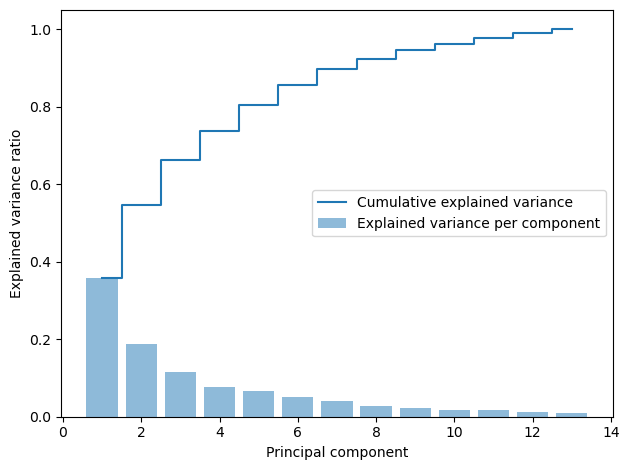

In [32]:
plt.bar(range(1, len(eigenvals)+1), var_explained, alpha=0.5, align='center',
        label='Explained variance per component')
plt.step(range(1, len(eigenvals)+1), cum_var_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
# eigenvectors stored as columns of a matrix -> [:, i]
eigen_pairs = [(np.abs(eigenvals[i]), eigenvecs[:, i])
               for i in range(len(eigenvals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

print(eigen_pairs[0])

for ep in eigen_pairs:
    print(np.linalg.norm(ep[1]))

(4.673841202208122, array([-0.14872732,  0.22904722, -0.03338967,  0.21916637, -0.14002402,
       -0.40182571, -0.42322967,  0.30114483, -0.30899698,  0.05586878,
       -0.30882218, -0.36929032, -0.30828504]))
1.0000000000000004
1.0000000000000002
1.0000000000000002
1.0000000000000007
1.0000000000000004
1.0000000000000002
1.0000000000000009
1.0000000000000004
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0000000000000007


## Features and eigenvectors

m eigenvector1: -1.5400479980945423
m eigenvector2: 0.4240073032511115

Dot product of eigenvectors 1 and 2: -0.025139774313238716 => linearly independent -> uncorrelated


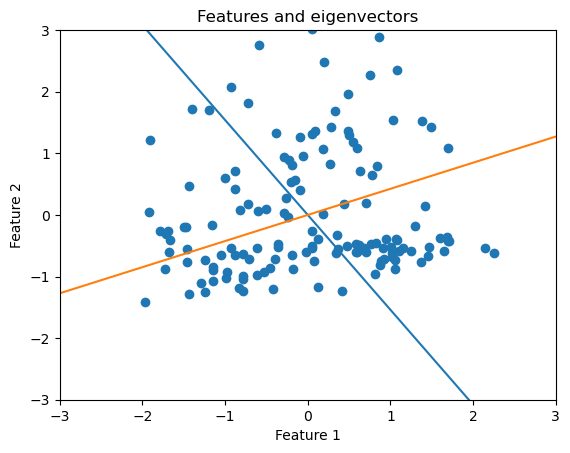

In [13]:
eigenvector2d_1 = eigen_pairs[0][1][0:2]
m_eigenvector2d_1 = eigenvector2d_1[1]/eigenvector2d_1[0]
print(f"m eigenvector1: {m_eigenvector2d_1}")

eigenvector2d_2 = eigen_pairs[1][1][0:2]
m_eigenvector2d_2 = eigenvector2d_2[1]/eigenvector2d_2[0]
print(f"m eigenvector2: {m_eigenvector2d_2}")

print(f"\nDot product of eigenvectors 1 and 2: {np.dot(eigenvector2d_1,eigenvector2d_2)} => linearly independent -> uncorrelated")
xs = np.linspace(-3,3,200)

plt.figure()
plt.plot(xs,xs*m_eigenvector2d_1)
plt.plot(xs,xs*m_eigenvector2d_2)
plt.scatter(X_train_std[:,0],X_train_std[:,1])
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Features and eigenvectors")
plt.show()

In [14]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', W)

Matrix W:
 [[-0.14872732  0.48711401]
 [ 0.22904722  0.2065399 ]
 [-0.03338967  0.30144962]
 [ 0.21916637 -0.04352763]
 [-0.14002402  0.29877422]
 [-0.40182571  0.04888575]
 [-0.42322967 -0.02480015]
 [ 0.30114483  0.07650036]
 [-0.30899698  0.01919307]
 [ 0.05586878  0.54529619]
 [-0.30882218 -0.23973982]
 [-0.36929032 -0.22377049]
 [-0.30828504  0.35200392]]


Now that we have our matrix _w_ we can transform our data by taking the dot product of the original data and the PCA-column vectors, projecting the original data onto the PCA axes. We do not need to multiply by the magnitude of the eigenvectors (the vectors we are projecting onto) as those get normalized by numpy to have unit length.

In [15]:
print("First sample: X_train_std[0]: {}\n".format(X_train_std[0]))
print("First sample transformed: X_train_std[0].dot(W):\n{}".format(X_train_std[0].dot(W)))

X_train_pca_transformed = X_train_std.dot(W)
print(X_train_std.shape)
print(W.shape)
print(X_train_pca_transformed.shape)
X_train_pca_transformed
# X_train_std.dot(W)*np.array([np.linalg.norm(W[:,i]) for i in range(W.shape[-1])])

First sample: X_train_std[0]: [-1.68663219 -0.25482431  0.28379926  0.5761055  -1.10568379 -0.55692029
 -0.33305239  0.94484033 -0.42658144 -0.96055888  0.24341489  0.19874555
 -0.21394802]

First sample transformed: X_train_std[0].dot(W):
[ 1.10890446 -1.80089046]
(141, 13)
(13, 2)
(141, 2)


array([[ 1.10890446e+00, -1.80089046e+00],
       [-2.15657002e+00,  5.84154546e-01],
       [ 2.03579231e+00,  2.10985367e+00],
       [ 3.07680408e+00,  5.33909491e-01],
       [ 1.48691103e+00, -1.28210914e+00],
       [-2.03100834e+00,  1.63842581e+00],
       [ 8.31954232e-01,  1.21936477e-02],
       [ 3.42265042e-01, -2.88887787e+00],
       [-2.29863394e+00,  2.22387154e+00],
       [ 3.24177402e-01, -2.00342333e+00],
       [-1.02427499e+00, -1.53572223e+00],
       [ 4.63198103e-01, -2.20890548e+00],
       [ 2.71633472e+00,  3.81755917e-01],
       [-7.52263076e-01, -2.01281686e+00],
       [-2.33514324e+00,  1.80567179e+00],
       [-1.64686337e+00,  5.05121477e-02],
       [-1.48546239e+00,  6.14175679e-01],
       [ 7.09211491e-01, -1.11029792e+00],
       [ 4.80127894e-01, -4.06837024e-01],
       [ 1.81531340e+00, -1.67366428e+00],
       [-7.78535307e-01, -1.60441283e+00],
       [-3.10064905e+00,  9.22741526e-01],
       [-9.64132026e-01, -1.78031895e+00],
       [-1.

In [16]:
X_train_pca_transformed

array([[ 1.10890446e+00, -1.80089046e+00],
       [-2.15657002e+00,  5.84154546e-01],
       [ 2.03579231e+00,  2.10985367e+00],
       [ 3.07680408e+00,  5.33909491e-01],
       [ 1.48691103e+00, -1.28210914e+00],
       [-2.03100834e+00,  1.63842581e+00],
       [ 8.31954232e-01,  1.21936477e-02],
       [ 3.42265042e-01, -2.88887787e+00],
       [-2.29863394e+00,  2.22387154e+00],
       [ 3.24177402e-01, -2.00342333e+00],
       [-1.02427499e+00, -1.53572223e+00],
       [ 4.63198103e-01, -2.20890548e+00],
       [ 2.71633472e+00,  3.81755917e-01],
       [-7.52263076e-01, -2.01281686e+00],
       [-2.33514324e+00,  1.80567179e+00],
       [-1.64686337e+00,  5.05121477e-02],
       [-1.48546239e+00,  6.14175679e-01],
       [ 7.09211491e-01, -1.11029792e+00],
       [ 4.80127894e-01, -4.06837024e-01],
       [ 1.81531340e+00, -1.67366428e+00],
       [-7.78535307e-01, -1.60441283e+00],
       [-3.10064905e+00,  9.22741526e-01],
       [-9.64132026e-01, -1.78031895e+00],
       [-1.

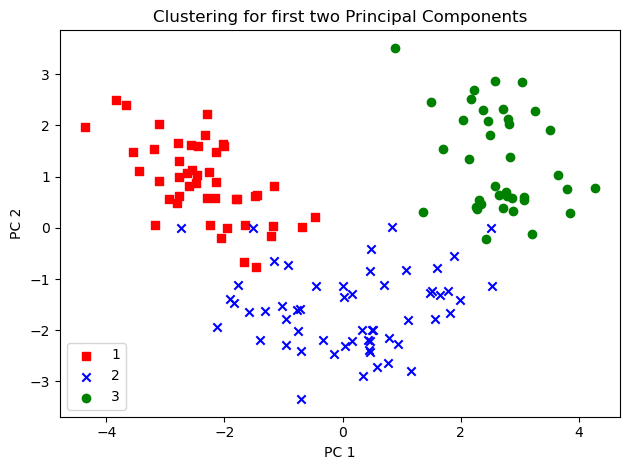

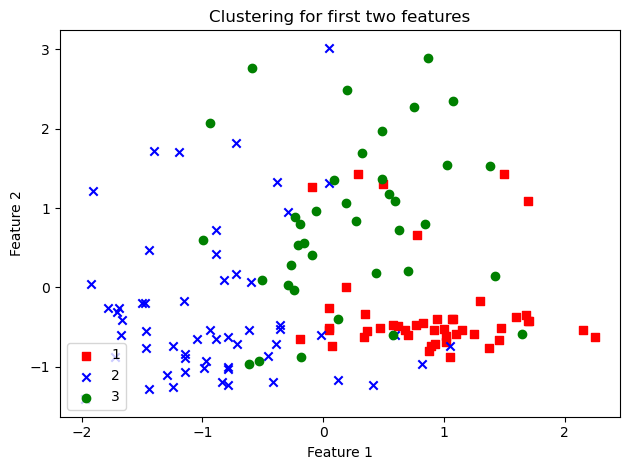

In [17]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca_transformed[y_train == l, 0], 
                X_train_pca_transformed[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title("Clustering for first two Principal Components")
plt.tight_layout()
plt.show()

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_std[y_train == l, 0], 
                X_train_std[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='lower left')
plt.title("Clustering for first two features")
plt.tight_layout()
plt.show()

## Sklearn

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.35697641, 0.18879778, 0.11650279, 0.07558816, 0.06678914,
       0.0515075 , 0.04027661, 0.02710804, 0.02190458, 0.01660937,
       0.01606455, 0.01311177, 0.0087633 ])

In [36]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.108904,-1.800890,0.786801,-0.246223,-0.863911,0.119522,0.161939,0.316763,-0.869798,-0.267346,-0.458163,-0.160563,-0.064436
1,2.156570,0.584155,-0.983158,-0.094212,-1.103989,-0.237718,-0.330305,-0.469574,-0.733317,-0.029797,-0.318224,0.101336,-0.015670
2,-2.035792,2.109854,0.842769,-0.472355,0.244172,0.751418,-0.577298,-0.953058,-0.075659,-0.158195,0.234723,-0.170558,-0.075442
3,-3.076804,0.533909,-1.033467,0.206638,-1.028197,-0.628661,0.574065,-0.003203,0.403761,-0.154235,0.063206,-0.023290,-0.158541
4,-1.486911,-1.282109,-0.270477,-0.969563,0.982994,-0.787113,0.936745,0.853539,-0.147244,0.056402,-0.097518,-0.437206,0.109545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.468522,-0.765000,-1.544696,-0.774985,-0.189388,-0.390717,0.029343,-0.026349,-0.107540,0.080558,-0.417096,0.203065,0.314817
137,-0.932783,-2.269023,-1.673964,-1.016038,0.528478,0.106156,0.671361,-0.149250,-0.077466,1.014693,-0.607523,-0.475957,0.306100
138,-2.577681,2.868527,-0.734424,0.170296,1.503768,0.174183,0.597694,0.012417,0.225214,-0.190125,-0.617347,-0.653973,0.076913
139,-2.493219,1.812791,0.292526,0.291228,0.375500,-0.099328,0.073902,-0.557745,0.029805,-0.141950,-0.291121,0.314138,-0.175098


In [35]:
var_explained = [(i /var_total) for i in sorted(eigenvals, reverse=True)]
var_explained

[0.356976414789491,
 0.18879778387988883,
 0.11650279229142413,
 0.07558815665480542,
 0.06678913658815801,
 0.05150750281336937,
 0.0402766065172239,
 0.027108044186750887,
 0.021904581388479057,
 0.01660937185151939,
 0.01606454616610035,
 0.013111765481813245,
 0.008763297390976506]